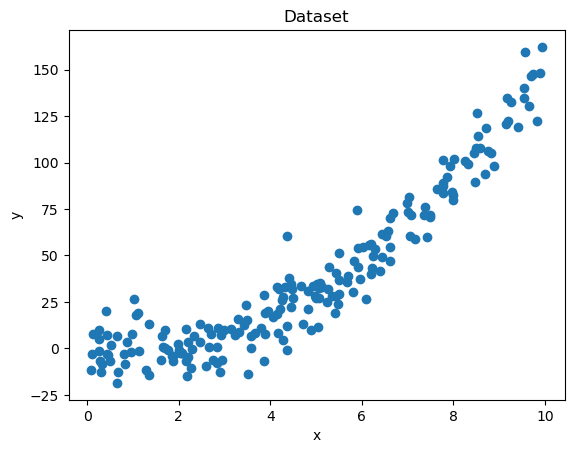

Train R^2: 0.941
Train MSE: 109.985
Test  R^2: 0.953
Test  MSE: 90.119


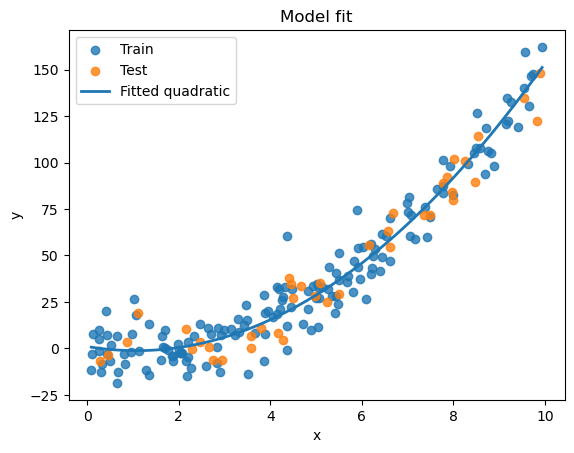

In [1]:
# One simple cell/script that does everything (aâ€“g)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- data (a + c plot) ---
np.random.seed(2)
x = np.random.uniform(0, 10, 200)
y = 2 * x**2 - 5 * x + 3 + np.random.normal(0, 10, 200)

plt.scatter(x, y)
plt.xlabel("x"); plt.ylabel("y"); plt.title("Dataset"); plt.show()

# --- split (b) ---
X = x.reshape(-1, 1)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# --- choose & train quadratic model (c,d) ---
poly = PolynomialFeatures(degree=2, include_bias=False)  # [x, x^2]
Xtr_poly = poly.fit_transform(Xtr)
model = LinearRegression().fit(Xtr_poly, ytr)

# --- train metrics (e) ---
yhat_tr = model.predict(Xtr_poly)
print("Train R^2:", round(r2_score(ytr, yhat_tr), 3))
print("Train MSE:", round(mean_squared_error(ytr, yhat_tr), 3))

# --- test metrics (f) ---
Xte_poly = poly.transform(Xte)
yhat_te = model.predict(Xte_poly)
print("Test  R^2:", round(r2_score(yte, yhat_te), 3))
print("Test  MSE:", round(mean_squared_error(yte, yhat_te), 3))

# --- visualize fit (g) ---
xg = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
yg = model.predict(poly.transform(xg))

plt.scatter(Xtr, ytr, label="Train", alpha=0.8)
plt.scatter(Xte, yte, label="Test",  alpha=0.8)
plt.plot(xg, yg, linewidth=2, label="Fitted quadratic")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Model fit"); plt.legend()
plt.show()
